In [1]:
import numpy as np
import os
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt 
import seaborn as sns

#attributes/features
* buying - price of the car: vhigh, high, med, low
* maint - price of maintenance: vhigh, high, med, low
* doors - number of doors: 2, 3, 4, 5more
* persons - highest number of passengers that can be transported: 2, 4, more
* lug_boot - size of luggage compartment/boot: small, med, big
* safety - estimated safety of car: low, med, high
#label - car acceptibility:bad, acc

# Load Data

In [2]:
training_data = pd.read_csv("training_data.csv")
training_data

,cid,buying,maint,doors,persons,lug_boot,safety,label
0,0,vhigh,med,2,4,med,med,bad
1,1,low,med,3,4,small,high,acc
2,2,med,med,3,more,med,high,acc
3,3,med,low,4,2,big,med,bad
4,4,low,high,4,more,big,high,acc
...,...,...,...,...,...,...,...,...
295,295,vhigh,low,3,2,small,med,bad
296,296,vhigh,vhigh,5more,4,small,low,bad
297,297,med,vhigh,3,4,med,high,acc
298,298,high,high,4,4,med,high,acc


In [3]:
training_data = training_data.drop(['cid'],axis=1)
training_data.describe()
#training_data

,buying,maint,doors,persons,lug_boot,safety,label
count,300,300,300,300,300,300,300
unique,4,4,4,3,3,3,2
top,low,low,2,more,big,high,bad
freq,115,92,85,114,113,131,150


In [4]:
training_data.label.value_counts()

label
bad    150
acc    150
Name: count, dtype: int64

# Data Preprocessing

In [5]:
# feature（X）：拿來輸入模型
# label（y）：拿來訓練正確答案
y = training_data['label']
X = training_data.drop(['label'],axis=1)

In [6]:
# 把 X 中所有類別型變數（categorical features）轉成 One-Hot Encoding
# get dummy：把類別型資料（例如：文字型態）轉換成數值型態的 One-Hot Encoding
# drop_first=True 代表避免虛擬變數陷阱 (Dummy Variable Trap)，少掉一個欄位，避免特徵完全線性依賴
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
296,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False
297,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False
298,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


In [7]:
# test_size
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
#If int, represents the absolute number of test samples.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 24)

In [8]:
X_train.shape, X_test.shape

((240, 15), (60, 15))

In [9]:
# 指定使用 Gini 指數作為分裂節點的標準
# Gini 指數是一種衡量資料純度的指標，值越小表示節點越純
dt = tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 31
Max depth: 9


In [10]:
# print the scores on training and test set

print('Training set - Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set - Accuracy: {:.4f}'.format(dt.score(X_test, y_test)))

Training set - Accuracy: 1.0000
Test set - Accuracy: 0.9667


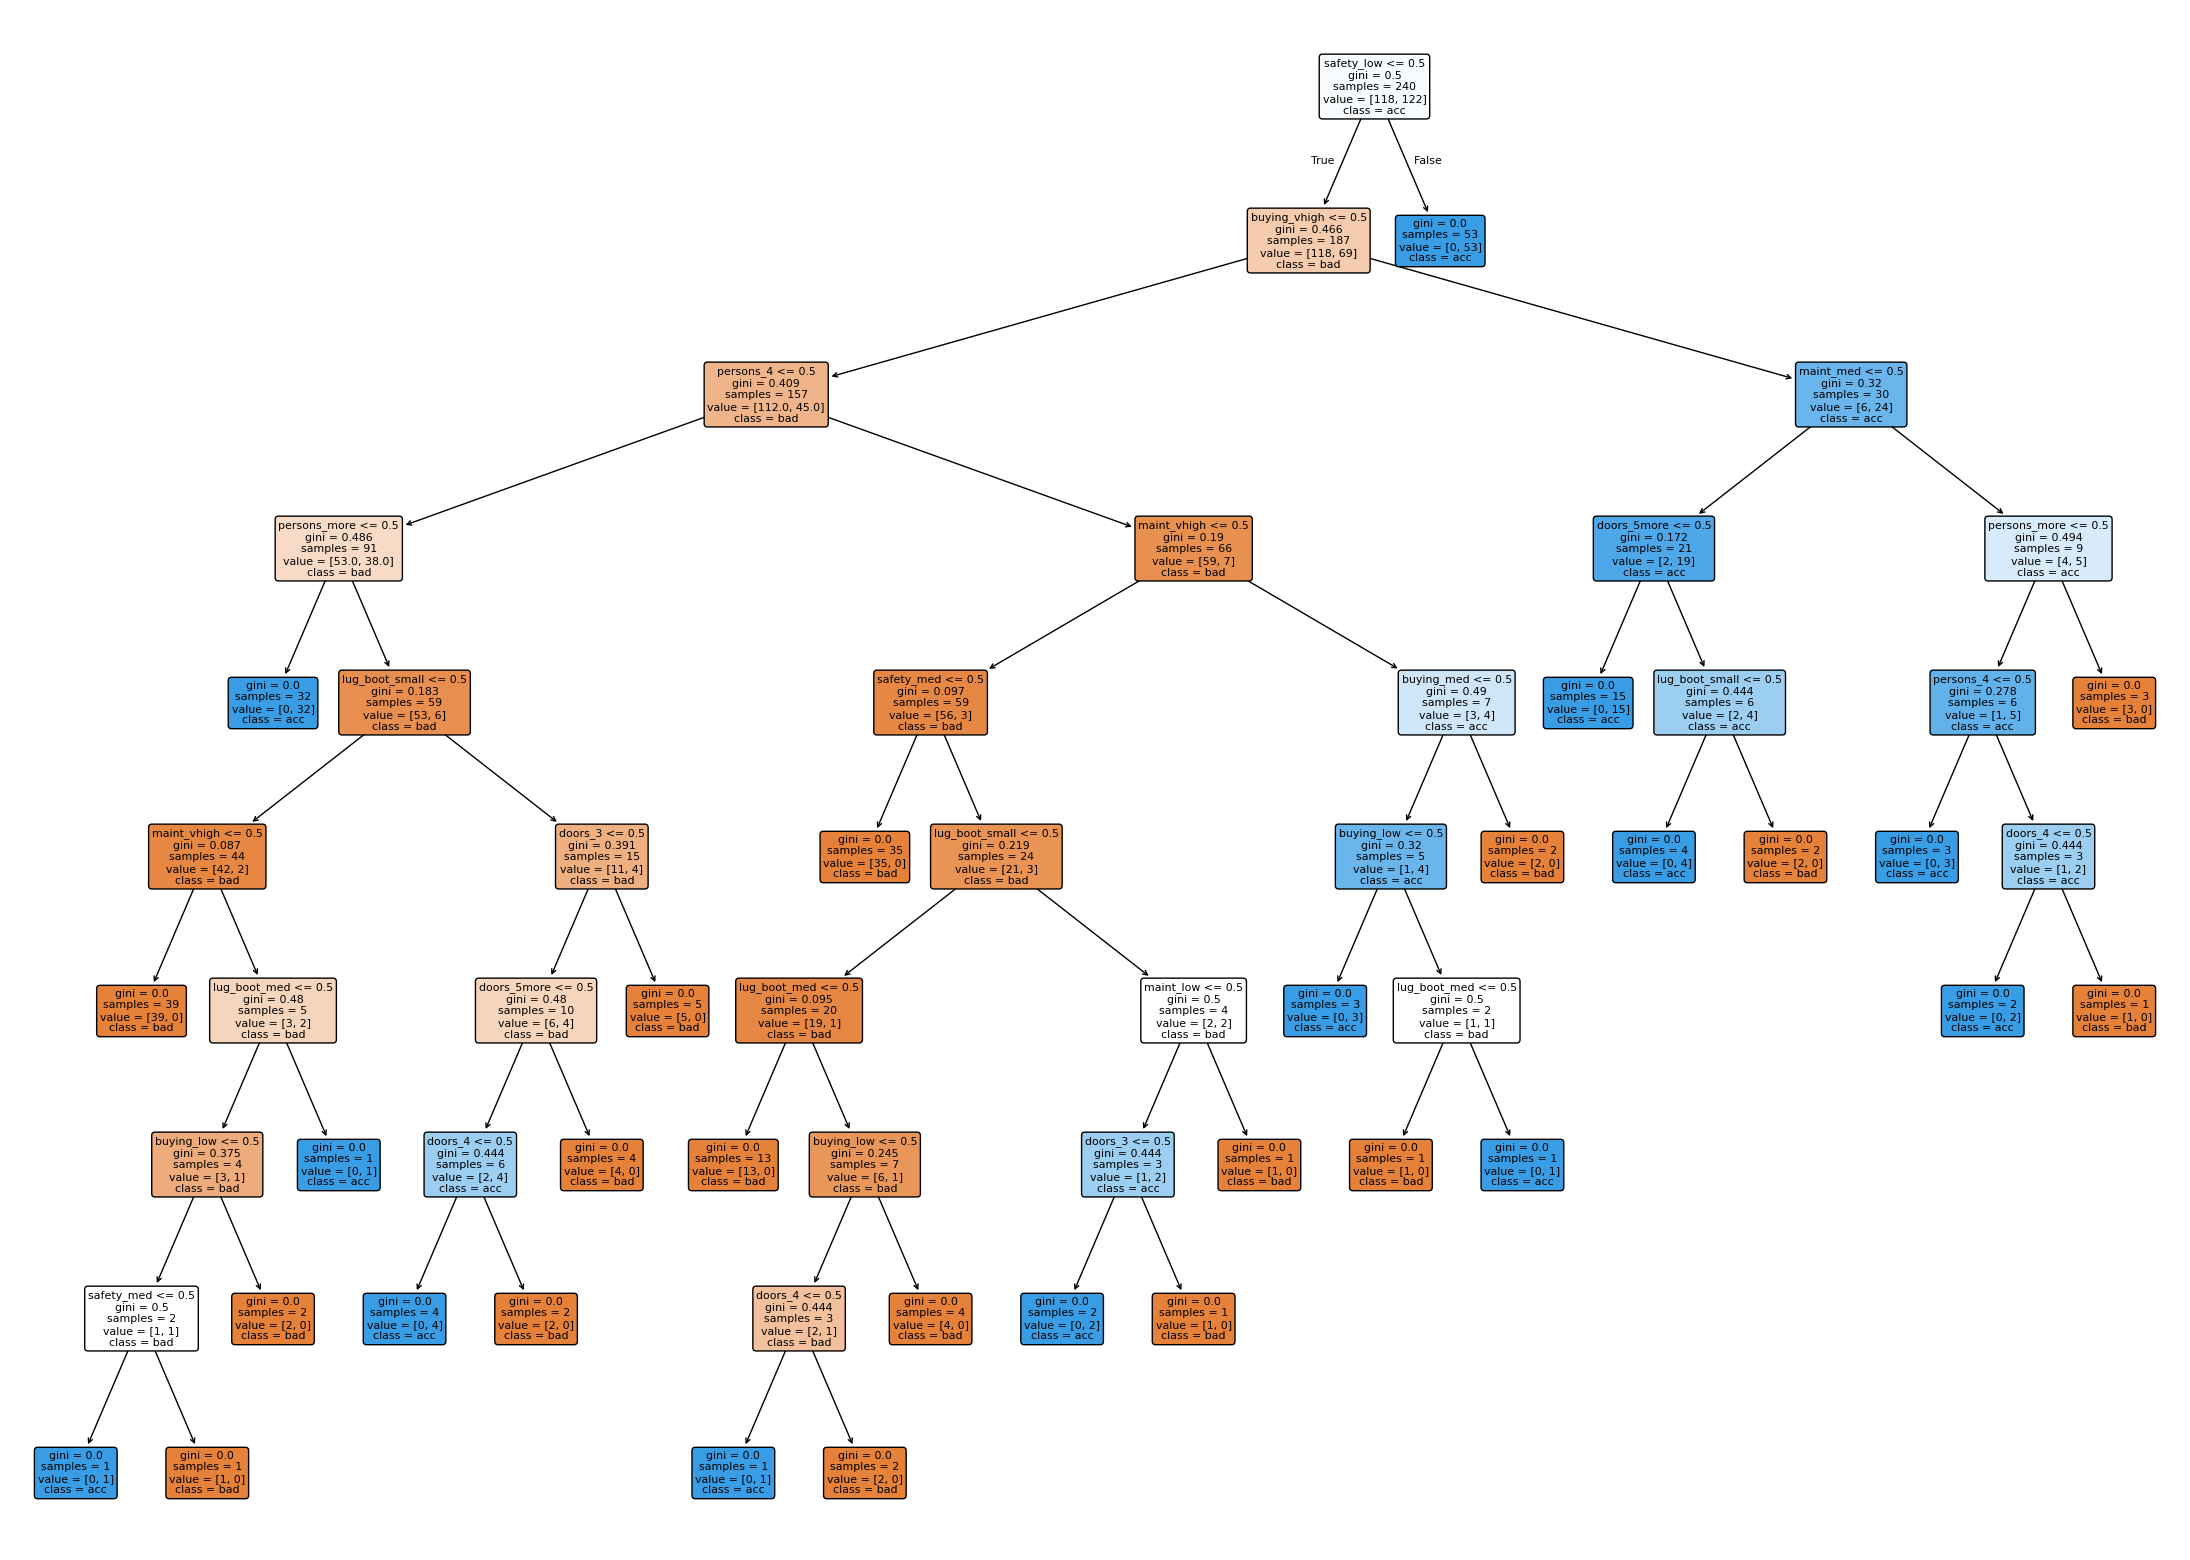

In [11]:
plt.figure(figsize=(28,20))
tree.plot_tree(dt.fit(X_train, y_train), 
               feature_names=X_encoded.columns,
               class_names=["bad","acc"],
               filled=True,
               rounded=True) 
plt.show()

### 第二題

In [12]:
# 使用全部 300 筆資料
X_full = X_encoded  # 已經進行 One-Hot Encoding 的特徵
y_full = y          # 標籤

# 建立完全生長的決策樹 (不限制深度或葉節點數)
dt_fully_grown = DecisionTreeClassifier(criterion="entropy")  # 使用 Entropy 作為 Impurity Metric
dt_fully_grown.fit(X_full, y_full)

# 列出最大深度和葉節點總數
max_depth = dt_fully_grown.get_depth()
leaf_nodes = dt_fully_grown.get_n_leaves()

print(f"Max Depth: {max_depth}")
print(f"Leaf Nodes: {leaf_nodes}")

Max Depth: 10
Leaf Nodes: 37


### 第三題

In [13]:
# 使用 Holdout 策略分割資料：70% 訓練集 (210 筆) 與 30% 測試集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [14]:
# 建立完全生長的決策樹 (不限制深度或葉節點數)
dt_fully_grown = DecisionTreeClassifier(criterion="entropy")  # 使用 Entropy 作為 Impurity Metric
dt_fully_grown.fit(X_train, y_train)

# (1) 列出最大深度
max_depth = dt_fully_grown.get_depth()

# (2) 列出葉節點總數
leaf_nodes = dt_fully_grown.get_n_leaves()

# 列出決策樹的最大深度及葉節點數
print("Max Depth:", dt_fully_grown.get_depth())
print("Leaf Nodes:", dt_fully_grown.get_n_leaves())

Max Depth: 9
Leaf Nodes: 27


In [15]:
# (3) 列出所有 Internal Nodes 的 Index、Attribute/Feature Name、Split Threshold
n_nodes = dt_fully_grown.tree_.node_count
features = dt_fully_grown.tree_.feature      # 每個節點對應的特徵索引，葉節點的值為 -2
thresholds = dt_fully_grown.tree_.threshold  # 每個節點的分割門檻

internal_nodes = []
for i in range(n_nodes):
    if features[i] != -2:  # 只處理 Internal Nodes，葉節點的特徵索引為 -2
        feat_name = X_encoded.columns[features[i]]
        internal_nodes.append((i, feat_name, thresholds[i]))

# 依照 Node Index 升冪排序
internal_nodes.sort(key=lambda x: x[0])

# 表頭
#print("Internal Nodes (Sorted by Node Index):")
#print("{:<12} {:<20} {:<15}".format("Node Index", "Attribute", "Split Threshold"))
#for node in internal_nodes:
    #print("{:<12} {:<20} {:.4f}".format(node[0], node[1], node[2]))
for node in internal_nodes:
    print("Internal Node Index:", node[0])
    print("  feature_name:", node[1])
    print("  split threshold:", "{:.4f}".format(node[2]))
    print("----------------------------")

Internal Node Index: 0
  feature_name: safety_low
  split threshold: 0.5000
----------------------------
Internal Node Index: 1
  feature_name: buying_vhigh
  split threshold: 0.5000
----------------------------
Internal Node Index: 2
  feature_name: maint_vhigh
  split threshold: 0.5000
----------------------------
Internal Node Index: 3
  feature_name: persons_4
  split threshold: 0.5000
----------------------------
Internal Node Index: 4
  feature_name: persons_more
  split threshold: 0.5000
----------------------------
Internal Node Index: 6
  feature_name: lug_boot_small
  split threshold: 0.5000
----------------------------
Internal Node Index: 8
  feature_name: doors_3
  split threshold: 0.5000
----------------------------
Internal Node Index: 9
  feature_name: doors_5more
  split threshold: 0.5000
----------------------------
Internal Node Index: 10
  feature_name: doors_4
  split threshold: 0.5000
----------------------------
Internal Node Index: 15
  feature_name: safety_med


### 第四題

In [32]:
# print the scores on training and test set

print('Training set - Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set - Accuracy: {:.4f}'.format(dt.score(X_test, y_test)))

Training set - Accuracy: 0.9952
Test set - Accuracy: 0.9889


In [40]:
# 計算使用訓練集 210 筆資料的錯誤率與測試集 90 筆資料的錯誤率

train_accuracy = dt_fully_grown.score(X_train, y_train)
test_accuracy = dt_fully_grown.score(X_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print("Training Error: {:.4f}".format(train_error))
print("Test Error: {:.4f}".format(test_error))

Training Error: 0.0000
Test Error: 0.0556


### 第五題

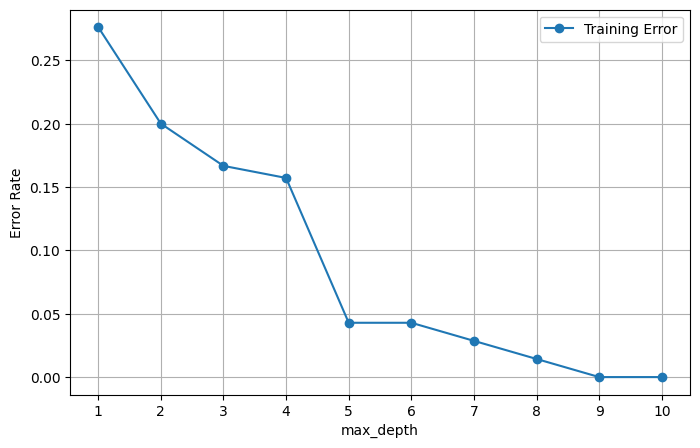

In [18]:
max_depth_list = list(range(1, 11))
training_errors = []

for depth in max_depth_list:
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dt_model.fit(X_train, y_train)
    train_acc = dt_model.score(X_train, y_train)
    train_error = 1 - train_acc
    training_errors.append(train_error)

plt.figure(figsize=(8, 5))
plt.plot(max_depth_list, training_errors, marker='o', label="Training Error")
plt.xlabel("max_depth")
plt.ylabel("Error Rate")
plt.xticks(max_depth_list)
plt.grid(True)
plt.legend()
plt.show()

### 第六題

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

# 設定欲搜尋的參數範圍
param_grid = {'max_depth': list(range(1, 11))}

# 外層 (5-fold) 與內層 (5-fold) 的交叉驗證
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

outer_scores = []  # 記錄每個外層折的測試集準確率
best_depths = []   # 記錄每個外層折選出的最佳 max_depth

# 進行 Nested Cross-Validation
for train_idx, test_idx in outer_cv.split(X_encoded, y):
    X_train_outer, X_test_outer = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]
    
    # 內層交叉驗證搜尋最佳參數
    grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=42),
                        param_grid,
                        cv=inner_cv,
                        scoring='accuracy')
    grid.fit(X_train_outer, y_train_outer)
    
    # 紀錄最佳 max_depth
    best_depth = grid.best_params_['max_depth']
    best_depths.append(best_depth)
    
    # 用外層測試集評估此輪最佳模型
    test_acc = grid.score(X_test_outer, y_test_outer)
    outer_scores.append(test_acc)
    
    print("Outer fold best max_depth: {}, Test Accuracy: {:.4f}".format(best_depth, test_acc))

# 評估總體的外部驗證結果與最佳 max_depth
mean_accuracy = np.mean(outer_scores)
from collections import Counter
most_common_depth = Counter(best_depths).most_common(1)[0][0]

print("\nOverall Outer CV Accuracy: {:.4f}".format(mean_accuracy))
print("建議的 max_depth (取各外部折中出現最多次者):", most_common_depth)

Outer fold best max_depth: 7, Test Accuracy: 0.9167
Outer fold best max_depth: 5, Test Accuracy: 0.9000
Outer fold best max_depth: 6, Test Accuracy: 0.9333
Outer fold best max_depth: 7, Test Accuracy: 0.9167
Outer fold best max_depth: 5, Test Accuracy: 0.9000

Overall Outer CV Accuracy: 0.9133
建議的 max_depth (取各外部折中出現最多次者): 7


### 第七題

In [88]:
# 建立決策樹模型
dt_selected = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=42)
dt_selected.fit(X_train, y_train)

# (1) 計算葉節點總數
leaf_nodes = dt_selected.get_n_leaves()

# (2) 計算訓練錯誤率
train_accuracy = dt_selected.score(X_train, y_train)
train_error = 1 - train_accuracy

# (3) 計算測試錯誤率
test_accuracy = dt_selected.score(X_test, y_test)
test_error = 1 - test_accuracy

# 輸出結果
print(f"Leaf Nodes: {leaf_nodes}")
print(f"Training Error: {train_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Leaf Nodes: 22
Training Error: 0.0333
Test Error: 0.0889


### 第八題

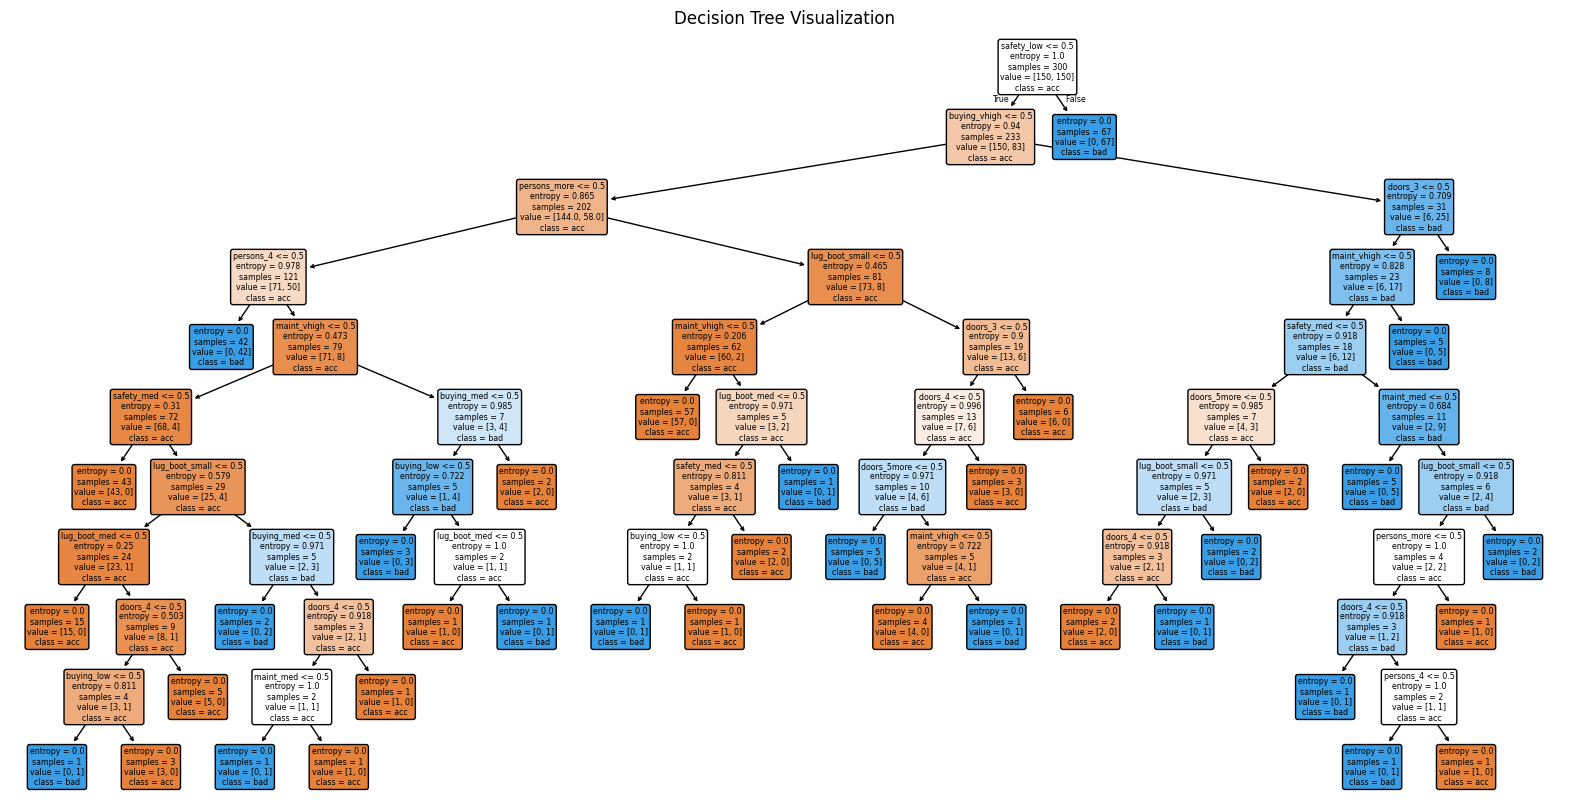

Max Depth: 10
Leaf Nodes: 37


In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 讀取資料
training_data = pd.read_csv("training_data.csv")

# 資料預處理
# 分離特徵 (X) 和標籤 (y)
y = training_data['label']
X = training_data.drop(['label', 'cid'], axis=1)

# 將類別型特徵轉換為 One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 訓練 Decision Tree 模型
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_encoded, y)

# (1) 最大深度
max_depth = dt.get_depth()

# (2) 葉節點總數
leaf_nodes = dt.get_n_leaves()

# (3) Decision Tree 視覺化
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_encoded.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# 輸出結果
print(f"Max Depth: {max_depth}")
print(f"Leaf Nodes: {leaf_nodes}")

In [ ]:
# 讀取測試資料
test_data = pd.read_csv("P3_test.csv")

# 預處理測試資料（與訓練資料保持一致）
X_test_data = pd.get_dummies(test_data, drop_first=True)

# 確保測試資料的特徵與訓練資料的特徵一致
X_test_data = X_test_data.reindex(columns=X_encoded.columns, fill_value=0)

# 使用訓練好的模型進行預測
predictions = dt.predict(X_test_data)

# 將預測結果轉換為 DataFrame
submission = pd.DataFrame({
    "id": test_data["cid"],  # 假設測試資料中有 "cid" 欄位作為識別碼
    "label": predictions     # 預測的標籤
})

# 將預測結果保存為 CSV 文件
submission.to_csv("submission.csv", index=False)